In [ ]:
%load_ext autoreload
%autoreload 2
import numpy as np
import get_data
import matplotlib.pyplot as plt
import population_activity as pop
import helper_functions as hf
import analysis
import plots
import decoding2 as decoding2
import statistics_test as st
from IPython.display import display, HTML
import place_cell as pc

def print_large(text):
    display(HTML(f"<span style='font-size: 20px;'>{text}</span>"))
    

c:\Users\Ole\anaconda3\envs\spyder-env\lib\site-packages\outdated\utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.3, the latest is 0.5.5.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


In [11]:
datapaths = ['D:/Antje_CA1/data_sig/170.h5', 'D:/Antje_CA1/data_sig/51004.h5', 'D:/Antje_CA1/data_sig/51007.h5', 'D:/Antje_CA1/data_sig/63.h5', 'D:/Antje_CA1/data_sig/64.h5', 'D:/Antje_CA1/data_sig/65.h5']
maps = [str(i) for i in np.arange(1, 13)] + ['14', '15', '17', '19']
days1 = [str(i) for i in np.arange(0, 13)] + ['14', '15', '17', '19']
configs = [
    ('Context1', maps, '0', days1, False, False, True),  # use ind_info
    ('Context1', maps, '0', days1, False, False, False)  # use inf_random
]

def run_analysis(datapath, context, sessions, ref_session, days, cross, is_drift, use_ind_info, percentage):
    ind_info, inf_random = analysis.spatial_info_cells(datapath, ref_session, context, percentage=percentage, bins=20, remove_inactive=False, standardize='stand', remove_day_inactive=False)
    
    cell_indices = ind_info if use_ind_info else inf_random
    res_align = analysis.loop_sessions_2datas(analysis.AK_align_2_sets2, datapath, ref_session, sessions, context, cross, 'dpca', 6, False, False, False, cell_indices)
   
    translation_scale = [r[8] for r in res_align]
    ref = [r[0][r[2]] for r in res_align]
    align_population = [r[1][r[2]] for r in res_align]
    align_population.insert(0, ref[0])
   
    pop_correlation = [pop.ManifoldAnalysis.population_correlation(res_align[day][1], res_align[0][0]) for day in range(len(res_align))]
    rotated_data2 = [r[4] for r in res_align]
    pos_data2 = [r[5] for r in res_align]
    data1 = res_align[0][6]
    pos_data1 = res_align[0][7]
    scores_test, scores_new_list, _, _, _, _ = decoding2.decode_neural_activity(
        data1, pos_data1, rotated_data2, pos_data2,
        use_shuffled=False, shuffle_seed=0, model_type='gnb'
    )

    return {
        'ref': ref,
        'align_population': align_population,
        'days': days,
        'pop_correlation': pop_correlation,
        'translation_scale': translation_scale,
        'scores_test': scores_test,
        'scores_new_list': scores_new_list,

    }

percentage =90
results = {}
for i, (context, sessions, ref_session, days, cross, is_drift, use_ind_info) in enumerate(configs):
    config_name = f"config_{i+1}"
    results[config_name] = {}
    for datapath in datapaths:
        file_name = datapath.split('/')[-1].split('.')[0]
        results[config_name][file_name] = run_analysis(
            datapath, context, sessions, ref_session, days, cross, is_drift, use_ind_info, percentage
        )

,Source,SS,ddof1,ddof2,MS,F,p-unc,p-GG-corr,ng2,eps
0,time,56.406627,16,80,3.525414,1.866984,0.036181,0.198284,0.118686,0.139678
1,condition,18.083148,1,5,18.083148,4.986656,0.075871,0.075871,0.041386,1.000000
2,time * condition,11.158256,16,80,0.697391,1.376836,0.174794,0.296689,0.025949,0.121118


,Timepoint,Condition 1,Condition 2,Test Used,Statistic,p-value,Adjusted p-value (bonferroni),Significance,Effect Size,Effect Size Type,Mean Cond 1,Mean Cond 2,Mean Diff,SD Diff,N,Normal Dist.,Normality p-value
0,T1,C1,C2,t-test,4.1860,0.0086,0.1463,,1.7089,Cohen's d,2.0187,1.4923,0.5264,0.3080,6,True,0.7641
1,T2,C1,C2,t-test,2.5495,0.0513,0.8720,,1.0408,Cohen's d,0.9936,0.9446,0.0490,0.0471,6,True,0.5236
2,T3,C1,C2,wilcoxon,0.0000,0.0312,0.5312,,0.8987,r,1.0660,0.8797,0.1863,0.2500,6,False,0.0037
3,T4,C1,C2,wilcoxon,4.0000,0.2188,1.0000,,0.5563,r,0.9945,0.8811,0.1134,0.2037,6,False,0.0397
4,T5,C1,C2,wilcoxon,4.0000,0.2188,1.0000,,0.5563,r,1.8100,1.2579,0.5521,1.3000,6,False,0.0001
5,T6,C1,C2,wilcoxon,1.0000,0.0625,1.0000,,0.8131,r,2.0472,1.4647,0.5825,1.1511,6,False,0.0003
6,T7,C1,C2,wilcoxon,0.0000,0.0312,0.5312,,0.8987,r,1.7142,1.0380,0.6762,1.4306,6,False,0.0001
7,T8,C1,C2,t-test,1.9968,0.1024,1.0000,,0.8152,Cohen's d,1.5478,1.0866,0.4612,0.5658,6,True,0.1620
8,T9,C1,C2,wilcoxon,6.0000,0.4375,1.0000,,0.3852,r,1.6663,1.5314,0.1349,0.2482,6,False,0.0194
9,T10,C1,C2,wilcoxon,8.0000,0.6875,1.0000,,0.2140,r,2.2961,1.2389,1.0571,2.0117,6,False,0.0344


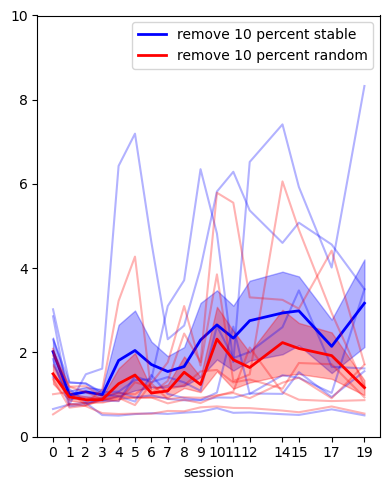

In [12]:
animals = list(results['config_1'].keys())
num_animals = len(animals)
num_days = len(results['config_1'][animals[0]]['scores_new_list']) + 1

mae_array = np.zeros((num_days, num_animals))
for i, animal in enumerate(animals):
    mae_array[0, i] = results['config_1'][animal]['scores_test']['mae']
    for day in range(1, num_days):
        mae_array[day, i] = results['config_1'][animal]['scores_new_list'][day-1]['mae']

mae_array_random = np.zeros((num_days, num_animals))
for i, animal in enumerate(animals):
    mae_array_random[0, i] = results['config_2'][animal]['scores_test']['mae']
    for day in range(1, num_days):
        mae_array_random[day, i] = results['config_2'][animal]['scores_new_list'][day-1]['mae']

fig,ax=plt.subplots(figsize=(4, 5))
plots.plot_average_geometry(
    [mae_array.T,
        mae_array_random.T],
    days,
    ax=ax,
    colors=['b', 'r'],
    ylim=[0, 10],
    labels=['remove 10 percent stable', 'remove 10 percent random']
)
stat1 = st.repeated_measures_anova_general([mae_array.T, mae_array_random.T])
display(stat1[0])
display(stat1[1])

In [18]:
percentage =70
results = {}
for i, (context, sessions, ref_session, days, cross, is_drift, use_ind_info) in enumerate(configs):
    config_name = f"config_{i+1}"
    results[config_name] = {}
    for datapath in datapaths:
        file_name = datapath.split('/')[-1].split('.')[0]
        results[config_name][file_name] = run_analysis(
            datapath, context, sessions, ref_session, days, cross, is_drift, use_ind_info, percentage
        )

,Source,SS,ddof1,ddof2,MS,F,p-unc,p-GG-corr,ng2,eps
0,time,57.112761,16,80,3.569548,1.290264,0.224133,0.317322,0.103251,0.123955
1,condition,9.310561,1,5,9.310561,4.237138,0.094622,0.094622,0.018424,1.000000
2,time * condition,8.465031,16,80,0.529064,1.798610,0.045647,0.200770,0.016779,0.161074


,Timepoint,Condition 1,Condition 2,Test Used,Statistic,p-value,Adjusted p-value (bonferroni),Significance,Effect Size,Effect Size Type,Mean Cond 1,Mean Cond 2,Mean Diff,SD Diff,N,Normal Dist.,Normality p-value
0,T1,C1,C2,t-test,3.1786,0.0246,0.4178,,1.2977,Cohen's d,2.0187,1.4622,0.5565,0.4288,6,True,0.4115
1,T2,C1,C2,t-test,-0.9144,0.4025,1.0000,,-0.3733,Cohen's d,0.9936,1.0210,-0.0274,0.0735,6,True,0.7066
2,T3,C1,C2,wilcoxon,10.0000,1.0000,1.0000,,0.0428,r,1.0659,0.9698,0.0961,0.2739,6,False,0.0011
3,T4,C1,C2,wilcoxon,10.0000,1.0000,1.0000,,0.0428,r,0.9945,0.9467,0.0478,0.1686,6,False,0.0244
4,T5,C1,C2,wilcoxon,5.0000,0.3125,1.0000,,0.4708,r,1.8100,2.0726,-0.2625,0.6205,6,False,0.0002
5,T6,C1,C2,t-test,0.9283,0.3958,1.0000,,0.3790,Cohen's d,2.0468,1.9711,0.0758,0.1999,6,True,0.1679
6,T7,C1,C2,wilcoxon,9.0000,0.8438,1.0000,,0.1284,r,1.7141,1.3465,0.3677,0.8298,6,False,0.0004
7,T8,C1,C2,t-test,1.5915,0.1724,1.0000,,0.6497,Cohen's d,1.5478,1.2149,0.3329,0.5124,6,True,0.1834
8,T9,C1,C2,t-test,0.3011,0.7754,1.0000,,0.1229,Cohen's d,1.6663,1.6408,0.0255,0.2074,6,True,0.7571
9,T10,C1,C2,wilcoxon,10.0000,1.0000,1.0000,,0.0428,r,2.2961,1.3958,0.9003,1.7761,6,False,0.0165


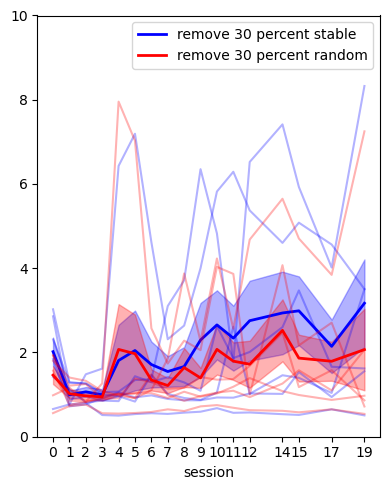

In [19]:
animals = list(results['config_1'].keys())
num_animals = len(animals)
num_days = len(results['config_1'][animals[0]]['scores_new_list']) + 1

mae_array = np.zeros((num_days, num_animals))
for i, animal in enumerate(animals):
    mae_array[0, i] = results['config_1'][animal]['scores_test']['mae']
    for day in range(1, num_days):
        mae_array[day, i] = results['config_1'][animal]['scores_new_list'][day-1]['mae']

mae_array_random = np.zeros((num_days, num_animals))
for i, animal in enumerate(animals):
    mae_array_random[0, i] = results['config_2'][animal]['scores_test']['mae']
    for day in range(1, num_days):
        mae_array_random[day, i] = results['config_2'][animal]['scores_new_list'][day-1]['mae']

fig,ax=plt.subplots(figsize=(4, 5))
plots.plot_average_geometry(
    [mae_array.T,
        mae_array_random.T],
    days,
    ax=ax,
    colors=['b', 'r'],
    ylim=[0, 10],
    labels=['remove 30 percent stable', 'remove 30 percent random']
)
stat1 = st.repeated_measures_anova_general([mae_array.T, mae_array_random.T])
display(stat1[0])
display(stat1[1])

In [15]:
percentage =50
results = {}
for i, (context, sessions, ref_session, days, cross, is_drift, use_ind_info) in enumerate(configs):
    config_name = f"config_{i+1}"
    results[config_name] = {}
    for datapath in datapaths:
        file_name = datapath.split('/')[-1].split('.')[0]
        results[config_name][file_name] = run_analysis(
            datapath, context, sessions, ref_session, days, cross, is_drift, use_ind_info, percentage
        )

c:\Users\Ole\anaconda3\envs\spyder-env\lib\site-packages\scipy\stats\_morestats.py:3414: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
c:\Users\Ole\anaconda3\envs\spyder-env\lib\site-packages\scipy\stats\_morestats.py:3428: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


,Source,SS,ddof1,ddof2,MS,F,p-unc,p-GG-corr,ng2,eps
0,time,80.590405,16,80,5.036900,2.674582,0.002018,0.110825,0.148319,0.135894
1,condition,1.503928,1,5,1.503928,1.071096,0.348134,0.348134,0.003239,1.000000
2,time * condition,4.845780,16,80,0.302861,0.566544,0.899717,0.604383,0.010363,0.142771


,Timepoint,Condition 1,Condition 2,Test Used,Statistic,p-value,Adjusted p-value (bonferroni),Significance,Effect Size,Effect Size Type,Mean Cond 1,Mean Cond 2,Mean Diff,SD Diff,N,Normal Dist.,Normality p-value
0,T1,C1,C2,t-test,2.2602,0.0733,1.0000,,0.9227,Cohen's d,2.0187,1.6138,0.4049,0.4388,6,True,0.0841
1,T2,C1,C2,t-test,-2.3918,0.0623,1.0000,,-0.9764,Cohen's d,0.9936,1.2142,-0.2206,0.2259,6,True,0.4477
2,T3,C1,C2,t-test,-0.5510,0.6054,1.0000,,-0.2249,Cohen's d,1.0659,1.1252,-0.0593,0.2636,6,True,0.3824
3,T4,C1,C2,t-test,-3.3819,0.0196,0.3338,,-1.3806,Cohen's d,0.9945,1.0906,-0.0962,0.0697,6,True,0.2213
4,T5,C1,C2,wilcoxon,8.0000,0.6875,1.0000,,0.2140,r,1.8099,1.1895,0.6204,1.9580,6,False,0.0005
5,T6,C1,C2,wilcoxon,9.0000,0.8438,1.0000,,0.1284,r,2.0472,1.4999,0.5473,1.4915,6,False,0.0001
6,T7,C1,C2,wilcoxon,5.0000,0.5002,1.0000,,0.4708,r,1.7141,1.4875,0.2266,1.0643,6,False,0.0038
7,T8,C1,C2,wilcoxon,10.0000,1.0000,1.0000,,0.0428,r,1.5478,1.3589,0.1889,0.5492,6,False,0.0021
8,T9,C1,C2,wilcoxon,6.0000,0.4375,1.0000,,0.3852,r,1.6663,1.6484,0.0179,0.9377,6,False,0.0391
9,T10,C1,C2,t-test,0.6376,0.5518,1.0000,,0.2603,Cohen's d,2.2961,1.8650,0.4311,1.6560,6,True,0.2325


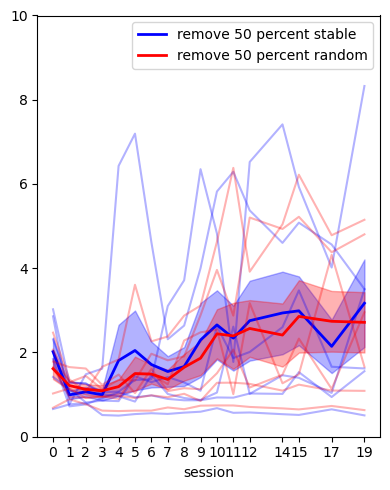

In [17]:
animals = list(results['config_1'].keys())
num_animals = len(animals)
num_days = len(results['config_1'][animals[0]]['scores_new_list']) + 1

mae_array = np.zeros((num_days, num_animals))
for i, animal in enumerate(animals):
    mae_array[0, i] = results['config_1'][animal]['scores_test']['mae']
    for day in range(1, num_days):
        mae_array[day, i] = results['config_1'][animal]['scores_new_list'][day-1]['mae']

mae_array_random = np.zeros((num_days, num_animals))
for i, animal in enumerate(animals):
    mae_array_random[0, i] = results['config_2'][animal]['scores_test']['mae']
    for day in range(1, num_days):
        mae_array_random[day, i] = results['config_2'][animal]['scores_new_list'][day-1]['mae']

fig,ax=plt.subplots(figsize=(4, 5))
plots.plot_average_geometry(
    [mae_array.T,
        mae_array_random.T],
    days,
    ax=ax,
    colors=['b', 'r'],
    ylim=[0, 10],
    labels=['remove 50 percent stable', 'remove 50 percent random']
)
stat1 = st.repeated_measures_anova_general([mae_array.T, mae_array_random.T])
display(stat1[0])
display(stat1[1])

In [23]:
maps = [str(i) for i in np.arange(1, 13)] +  ['14', '15', '17', '19']
maps_reverse =  ['17', '15', '14'] + [str(i) for i in np.arange(12, -1, -1)]
datapaths = ['D:/Antje_CA1/data_sig/170.h5', 'D:/Antje_CA1/data_sig/51004.h5', 'D:/Antje_CA1/data_sig/51007.h5', 'D:/Antje_CA1/data_sig/63.h5', 'D:/Antje_CA1/data_sig/64.h5', 'D:/Antje_CA1/data_sig/65.h5']
days1 = [str(i) for i in np.arange(0, 13)] +  ['14', '15', '17', '19']
days2 = ['19','17', '15', '14'] + [str(i) for i in np.arange(12, -1, -1)]

configs = [
    ('Context1', maps, '0', days1, False, False),  
    #('Context2', maps, '0', days1, False, False),
    #('Context2', maps_reverse, '19', days2, False, False),
    #('Context2', maps, '19', days1, True, False),
    ('Context1', None, '0', days1, False, True)
     
]

def run_analysis(datapath, context, sessions, ref_session, days, cross, is_drift):
    if not is_drift:
        res_align = analysis.loop_sessions_2datas(analysis.AK_align_2_sets2, datapath, ref_session, sessions, context, cross, 'pca', 6)
    else:
        simu_drift = analysis.simulate_drift(
            datapath, 
            session=ref_session, 
            Context=context, 
            days=len(days),  
            drift_type='circular', 
            standardize='stand', 
            odd_even=True, 
            global_seed=0, 
            remove_day_inactive=True
        )
        res_align = analysis.loop_sessions_3(
            analysis.AK_align_2_sets_sim, 
            simu_drift['drift_data'][0], 
            simu_drift['drift_data'][1:], 
            simu_drift['pos'],
            'pca',
            6
        )
    
    translation_scale = [r[8] for r in res_align]
    ref = [r[0][r[2]] for r in res_align]
    align_population = [r[1][r[2]] for r in res_align]
    align_population.insert(0, ref[0])
    
    pop_correlation = [pop.ManifoldAnalysis.population_correlation(res_align[day][1], res_align[0][0]) for day in range(len(res_align))]
    error = [[r[3][6], r[3][5]] for r in res_align]
    rotated_data2 = [r[4] for r in res_align]
    pos_data2 = [r[5] for r in res_align]
    data1 = res_align[0][6]
    pos_data1 = res_align[0][7]
    scores_test, scores_new_list, _, _, _, _ = decoding2.decode_neural_activity(
        data1, pos_data1, rotated_data2, pos_data2, 
        use_shuffled=False, shuffle_seed=0, model_type='gnb'
    )
    scores_test_shuff, scores_new_list_shuff, _, _, _, _ = decoding2.decode_neural_activity(
        data1, pos_data1, rotated_data2, pos_data2, 
        use_shuffled=True, shuffle_seed=0, model_type='gnb'
    )
     
    return {
        'ref': ref,
        'align_population': align_population,
        'days': days,
        'pop_correlation': pop_correlation,
        'translation_scale': translation_scale,
        'scores_test': scores_test,
        'scores_new_list': scores_new_list,
        'scores_test_shuff': scores_test_shuff,
        'scores_new_list_shuff': scores_new_list_shuff,
        'errors': error
    }

results = {}
for i, (context, sessions, ref_session, days, cross, is_drift) in enumerate(configs):
    config_name = f"config_{i+1}"
    results[config_name] = {}
    for datapath in datapaths:
        file_name = datapath.split('/')[-1].split('.')[0]
        results[config_name][file_name] = run_analysis(
            datapath, context, sessions, ref_session, days, cross, is_drift
        )

C:\Users\Ole\AppData\Local\Temp\ipykernel_29720\445452346.py:44: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


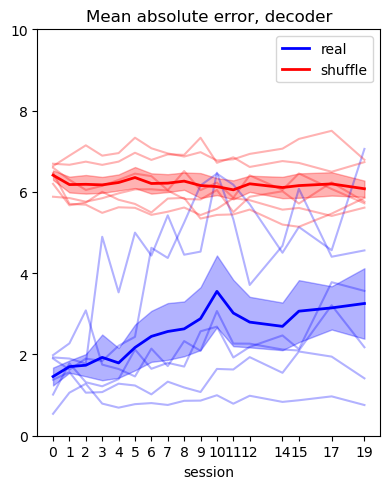

,Source,SS,ddof1,ddof2,MS,F,p-unc,p-GG-corr,ng2,eps
0,time,15.772005,16,80,0.985750,2.286334,0.008263,0.139420,0.054827,0.148232
1,condition,688.664310,1,5,688.664310,26.869971,0.003515,0.003515,0.716939,1.000000
2,time * condition,22.320898,16,80,1.395056,3.342135,0.000176,0.083209,0.075865,0.115723


,Timepoint,Condition 1,Condition 2,Test Used,Statistic,p-value,Adjusted p-value (bonferroni),Significance,Effect Size,Effect Size Type,Mean Cond 1,Mean Cond 2,Mean Diff,SD Diff,N,Normal Dist.,Normality p-value
0,T1,C1,C2,t-test,-15.0541,2.3427e-05,0.0004,***,-6.1458,Cohen's d,1.4561,6.4110,-4.9549,0.8062,6,True,0.7650
1,T2,C1,C2,t-test,-14.6854,2.6457e-05,0.0004,***,-5.9953,Cohen's d,1.7006,6.1801,-4.4794,0.7472,6,True,0.6699
2,T3,C1,C2,t-test,-9.4841,0.0002,0.0037,**,-3.8719,Cohen's d,1.7345,6.1864,-4.4519,1.1498,6,True,0.9094
3,T4,C1,C2,t-test,-6.1067,0.0017,0.0290,*,-2.4930,Cohen's d,1.9275,6.1725,-4.2451,1.7028,6,True,0.3810
4,T5,C1,C2,t-test,-8.7347,0.0003,0.0055,**,-3.5659,Cohen's d,1.7914,6.2309,-4.4395,1.2450,6,True,0.8658
5,T6,C1,C2,t-test,-6.1651,0.0016,0.0278,*,-2.5169,Cohen's d,2.1708,6.3531,-4.1822,1.6617,6,True,0.7676
6,T7,C1,C2,t-test,-4.5833,0.0059,0.1008,,-1.8711,Cohen's d,2.4448,6.2068,-3.7621,2.0106,6,True,0.6252
7,T8,C1,C2,t-test,-3.9784,0.0105,0.1793,,-1.6242,Cohen's d,2.5651,6.2154,-3.6503,2.2475,6,True,0.2603
8,T9,C1,C2,t-test,-4.2054,0.0084,0.1436,,-1.7168,Cohen's d,2.6294,6.2647,-3.6353,2.1174,6,True,0.7881
9,T10,C1,C2,t-test,-3.1804,0.0245,0.4170,,-1.2984,Cohen's d,2.8815,6.1565,-3.2749,2.5223,6,True,0.7167


C:\Users\Ole\AppData\Local\Temp\ipykernel_29720\445452346.py:100: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


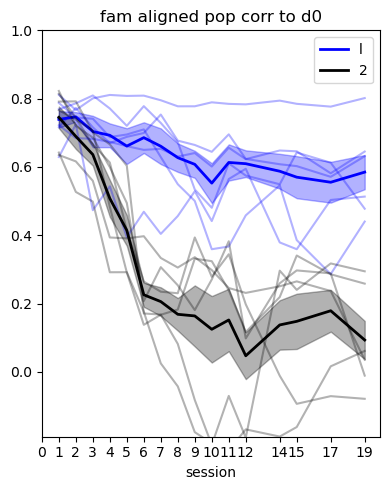

,Source,SS,ddof1,ddof2,MS,F,p-unc,p-GG-corr,ng2,eps
0,time,3.684805,15,75,0.245654,22.141698,1.309929e-21,0.000008,0.511395,0.203872
1,condition,5.795929,1,5,5.795929,63.235247,5.069900e-04,0.000507,0.622113,1.000000
2,time * condition,1.420357,15,75,0.094690,7.217098,1.746482e-09,0.006763,0.287466,0.160624


,Timepoint,Condition 1,Condition 2,Test Used,Statistic,p-value,Adjusted p-value (bonferroni),Significance,Effect Size,Effect Size Type,Mean Cond 1,Mean Cond 2,Mean Diff,SD Diff,N,Normal Dist.,Normality p-value
0,T1,C1,C2,t-test,-0.2779,0.7922,1.0000,,-0.1134,Cohen's d,0.7392,0.7452,-0.0060,0.0525,6,True,0.1704
1,T2,C1,C2,t-test,1.8533,0.1230,1.0000,,0.7566,Cohen's d,0.7466,0.6894,0.0571,0.0755,6,True,0.1875
2,T3,C1,C2,t-test,2.4886,0.0553,0.8841,,1.0160,Cohen's d,0.7038,0.6362,0.0675,0.0665,6,True,0.7151
3,T4,C1,C2,t-test,6.3809,0.0014,0.0224,*,2.6050,Cohen's d,0.6926,0.5078,0.1848,0.0709,6,True,0.8555
4,T5,C1,C2,t-test,5.9557,0.0019,0.0305,*,2.4314,Cohen's d,0.6610,0.4143,0.2468,0.1015,6,True,0.9680
5,T6,C1,C2,t-test,7.3534,0.0007,0.0117,*,3.0020,Cohen's d,0.6858,0.2256,0.4602,0.1533,6,True,0.3373
6,T7,C1,C2,t-test,8.2962,0.0004,0.0066,**,3.3869,Cohen's d,0.6605,0.2057,0.4549,0.1343,6,True,0.2833
7,T8,C1,C2,t-test,7.7992,0.0006,0.0089,**,3.1840,Cohen's d,0.6272,0.1684,0.4587,0.1441,6,True,0.5739
8,T9,C1,C2,t-test,3.9408,0.0110,0.1752,,1.6088,Cohen's d,0.6076,0.1637,0.4439,0.2759,6,True,0.2351
9,T10,C1,C2,t-test,3.0946,0.0270,0.4323,,1.2634,Cohen's d,0.5526,0.1246,0.4280,0.3388,6,True,0.3291


,Source,SS,DF,MS,F,p-unc,ng2,eps
0,time,0.355796,15,0.02372,4.068879,0.000023,0.219925,0.14592
1,Error,0.437216,75,0.00583,NaN,NaN,NaN,NaN


In [24]:
print_large('PCA: familar')
configs = ['config_1']
def analyze_mae_config(results, config):
    animals = list(results[config].keys())
    num_animals = len(animals)
    num_days = len(results[config][animals[0]]['scores_new_list']) + 1
    
    mae_array = np.zeros((num_days, num_animals))
    mae_array_shuff = np.zeros((num_days, num_animals))
    
    for i, animal in enumerate(animals):
        mae_array[0, i] = results[config][animal]['scores_test']['mae']
        mae_array_shuff[0, i] = results[config][animal]['scores_test_shuff']['mae']
        
        for day in range(1, num_days):
            mae_array[day, i] = results[config][animal]['scores_new_list'][day-1]['mae']
            mae_array_shuff[day, i] = results[config][animal]['scores_new_list_shuff'][day-1]['mae']
    
    return mae_array, mae_array_shuff

def plot_mae_configs_individual(results, configs, days1, days2):
    for i, config in enumerate(configs):
        mae_array, mae_array_shuff = analyze_mae_config(results, config)
        print_large('\n' + '='*50)
        print_large(conf[i])
        print_large('\n' + '='*50)
        fig,ax=plt.subplots(figsize=(4, 5))
        
        days = days1 #if i != 2 else days2
        mae_array = mae_array[::-1] if i == 2 else mae_array
        mae_array_shuff = mae_array_shuff[::-1] if i == 2 else mae_array_shuff

        plots.plot_average_geometry(
            [mae_array.T,
             mae_array_shuff.T],
            days,
            ax=ax,
            colors=['b', 'r'],
            ylim=[0, 10],
            labels=['real', 'shuffle']
        )
        
        plt.title(f'Mean absolute error, decoder')
        plt.tight_layout()
        plt.show()


        stat1 = st.repeated_measures_anova_general([mae_array.T, mae_array_shuff.T])
        display(stat1[0])
        display(stat1[1])


conf = ['fam', 'nov forward', 'nov reverse', 'across env', 'sim drift']
plot_mae_configs_individual(results, configs, days1, days2)



def create_pop_correlation_arrays(results, datapaths):
    pop_correlation_arrays = {}
    for config_name, config_results in results.items():
        pop_correlation_arrays[config_name] = np.column_stack([
            config_results[file_name]['pop_correlation']
            for file_name in [path.split('/')[-1].split('.')[0] for path in datapaths]
        ])
    return pop_correlation_arrays

def plot_pop_correlations_individual(pop_correlation_arrays, maps, maps_reverse):
    plot_configs = [
        {
            'config': 'config_1',
            'title': 'fam aligned pop corr to d0',
            'maps': maps
            
        },
        {
            'config': 'config_2',
            'title': 'sim fam aligned pop corr to d0',
            'maps': maps
        }

    ]

    i=0

    print_large('\n' + '='*50)
    #print_large(config[i])
    print_large('\n' + '='*50)
    fig,ax=plt.subplots(figsize=(4, 5))
    

    plots.plot_average_geometry(
        [pop_correlation_arrays['config_1'].T, pop_correlation_arrays['config_2'].T],
        plot_configs[0]['maps'],
        colors=['b', 'k'],
        ax=ax,
        title=plot_configs[0]['title'],
        ylim=[-0.19, 1],
        labels=['l', '2']
    )
    plt.tight_layout()
    plt.show()
    print_large('\nTWO-WAY REPEATED ANOVA')
    anova=st.repeated_measures_anova_general([pop_correlation_arrays['config_1'].T, pop_correlation_arrays['config_2'].T])
    display(anova[0])
    display(anova[1])
    display(st.repeated_measures_anova_single_condition(pop_correlation_arrays['config_1'].T))
    i+=1
        

pop_correlation_arrays = create_pop_correlation_arrays(results, datapaths)
plot_pop_correlations_individual(pop_correlation_arrays, maps, maps_reverse)


In [6]:
# maps = [str(i) for i in np.arange(1, 13)] +  ['14', '15', '17', '19']
# datapaths = ['D:/Antje_CA1/data_sig/170.h5', 'D:/Antje_CA1/data_sig/51004.h5', 'D:/Antje_CA1/data_sig/51007.h5', 'D:/Antje_CA1/data_sig/63.h5', 'D:/Antje_CA1/data_sig/64.h5', 'D:/Antje_CA1/data_sig/65.h5']
# days1 = [str(i) for i in np.arange(0, 13)] +  ['14', '15', '17', '19']


# configs = [
#     ('Context1', maps, '0', days1, False, False),  
#     ('Context1', None, '0', days1, False, True)
     
# ]

# def run_analysis(datapath, context, sessions, ref_session, days, cross, is_drift):
#     if not is_drift:
#         stable=analysis.neuron_stability(datapath, 'Context1', [ref_session] + maps, standardize='stand', remove_day_inactive=False)
#         res_align = analysis.loop_sessions_2datas(analysis.AK_align_2_sets2, datapath, ref_session, sessions, context, cross, 'pca', 6, stable, 0.7)
#     else:
#         simu_drift = analysis.simulate_drift(
#             datapath, 
#             session=ref_session, 
#             Context=context, 
#             days=len(days),  
#             drift_type='circular', 
#             standardize='stand', 
#             odd_even=True, 
#             global_seed=0, 
#             remove_day_inactive=True
#         )
#         res_align = analysis.loop_sessions_3(
#             analysis.AK_align_2_sets_sim, 
#             simu_drift['drift_data'][0], 
#             simu_drift['drift_data'][1:], 
#             simu_drift['pos'],
#             'pca',
#             6
#         )
    
#     translation_scale = [r[8] for r in res_align]
#     ref = [r[0][r[2]] for r in res_align]
#     align_population = [r[1][r[2]] for r in res_align]
#     align_population.insert(0, ref[0])
    
#     pop_correlation = [pop.ManifoldAnalysis.population_correlation(res_align[day][1], res_align[0][0]) for day in range(len(res_align))]
#     error = [[r[3][6], r[3][5]] for r in res_align]
#     rotated_data2 = [r[4] for r in res_align]
#     pos_data2 = [r[5] for r in res_align]
#     data1 = res_align[0][6]
#     pos_data1 = res_align[0][7]
#     scores_test, scores_new_list, _, _, _, _ = decoding2.decode_neural_activity(
#         data1, pos_data1, rotated_data2, pos_data2, 
#         use_shuffled=False, shuffle_seed=0, model_type='gnb'
#     )
#     scores_test_shuff, scores_new_list_shuff, _, _, _, _ = decoding2.decode_neural_activity(
#         data1, pos_data1, rotated_data2, pos_data2, 
#         use_shuffled=True, shuffle_seed=0, model_type='gnb'
#     )
     
#     return {
#         'ref': ref,
#         'align_population': align_population,
#         'days': days,
#         'pop_correlation': pop_correlation,
#         'translation_scale': translation_scale,
#         'scores_test': scores_test,
#         'scores_new_list': scores_new_list,
#         'scores_test_shuff': scores_test_shuff,
#         'scores_new_list_shuff': scores_new_list_shuff,
#         'errors': error
#     }

# results = {}
# for i, (context, sessions, ref_session, days, cross, is_drift) in enumerate(configs):
#     config_name = f"config_{i+1}"
#     results[config_name] = {}
#     for datapath in datapaths:
#         file_name = datapath.split('/')[-1].split('.')[0]
#         results[config_name][file_name] = run_analysis(
#             datapath, context, sessions, ref_session, days, cross, is_drift
#         )

In [7]:
# def analyze_mae_config(results, config):
#     animals = list(results[config].keys())
#     num_animals = len(animals)
#     num_days = len(results[config][animals[0]]['scores_new_list']) + 1
    
#     mae_array = np.zeros((num_days, num_animals))
#     mae_array_shuff = np.zeros((num_days, num_animals))
    
#     for i, animal in enumerate(animals):
#         mae_array[0, i] = results[config][animal]['scores_test']['mae']
#         mae_array_shuff[0, i] = results[config][animal]['scores_test_shuff']['mae']
        
#         for day in range(1, num_days):
#             mae_array[day, i] = results[config][animal]['scores_new_list'][day-1]['mae']
#             mae_array_shuff[day, i] = results[config][animal]['scores_new_list_shuff'][day-1]['mae']
    
#     return mae_array, mae_array_shuff

# def plot_mae_configs_individual(results, configs, days1):
#     for i, config in enumerate(configs):
#         mae_array, mae_array_shuff = analyze_mae_config(results, config)
#         print_large('\n' + '='*50)
#         print_large(config[i])
#         print_large('\n' + '='*50)
#         fig,ax=plt.subplots(figsize=(4, 5))
        
#         days = days1 #if i != 2 else days2
#         mae_array = mae_array[::-1] if i == 2 else mae_array
#         mae_array_shuff = mae_array_shuff[::-1] if i == 2 else mae_array_shuff

#         plots.plot_average_geometry(
#             [mae_array.T,
#              mae_array_shuff.T],
#             days,
#             ax=ax,
#             colors=['b', 'r'],
#             ylim=[0, 10],
#             labels=['real', 'shuffle']
#         )
        
#         plt.title(f'Mean absolute error, decoder')
#         plt.tight_layout()
#         plt.show()


#         stat1 = st.repeated_measures_anova_general([mae_array.T, mae_array_shuff.T])
#         display(stat1[0])
#         display(stat1[1])
        

# configs = ['config_1', 'config_2']
# plot_mae_configs_individual(results, configs, days1)


In [8]:
# def create_pop_correlation_arrays(results, datapaths):
#     pop_correlation_arrays = {}
#     for config_name, config_results in results.items():
#         pop_correlation_arrays[config_name] = np.column_stack([
#             config_results[file_name]['pop_correlation']
#             for file_name in [path.split('/')[-1].split('.')[0] for path in datapaths]
#         ])
#     return pop_correlation_arrays

# def plot_pop_correlations_individual(pop_correlation_arrays, maps):
#     plot_configs = [
#         {
#             'config': 'config_1',
#             'title': 'fam aligned pop corr to d0',
#             'maps': maps
#         },
#         {
#             'config': 'config_2',
#             'title': 'nov aligned pop corr to d0',
#             'maps': maps
#         },

#     ]

#     i=0
#     for config in plot_configs:
#         print_large('\n' + '='*50)
#         print_large('\n' + '='*50)
#         fig,ax=plt.subplots(figsize=(4, 5))
        
#         if config['config'] == 'config_3':
#             pop_correlation_arrays[config['config']] = pop_correlation_arrays[config['config']][::-1]

#         plots.plot_average_geometry(
#             [pop_correlation_arrays[config['config']].T],
#             config['maps'],
#             colors=['k'],
#             ax=ax,
#             title=config['title'],
#             ylim=[-0.19, 1],
#             labels=['l']
#         )
#         plt.tight_layout()
#         plt.show()
#         display(st.repeated_measures_anova_single_condition(pop_correlation_arrays[config['config']].T))
#         i+=1
        

# pop_correlation_arrays = create_pop_correlation_arrays(results, datapaths)
# plot_pop_correlations_individual(pop_correlation_arrays, maps)